# Numrical Steady-State Solution for a version of Aiyagari (1994) economy

In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
import scipy.optimize as opt

In [2]:
# Set the parameters
beta = 0.96
delta = 0.06
alpha = 0.36
u_bar = 0.1
N = 200
params = alpha, beta, delta
threshold = 1e-10

In [6]:
def get_r(k_bar, u, params):
    alpha, beta, delta = params
    r = alpha * (k_bar**(alpha-1)) * (1-u)**(1-alpha)
    return r

def get_w(k_bar, u, params):
    alpha, beta, delta = params
    w = (1-alpha) * (k_bar**alpha) * (1-u)**(-alpha)
    return w

def get_kbar(params):
    alpha, beta, delta = params
    k_bar = ((alpha*beta)/(1-beta*(1-delta)))**(1/(1-alpha))
    return k_bar

def vf_itr(k_grid, params, r, w, MC):
    tol = 1e-04
    max_iter = 1000
    
    alpha, beta, delta = params
    
    V = np.zeros((len(k_grid),2))
    pol = np.zeros_like(V)
    
    crit = 1
    itr = 0
    
    for itr in range(max_iter):
        V_new = np.zeros_like(V)
        epsilon = np.array([1,0])
        
        for ii,k in enumerate(k_grid):
            for ee,epsil in enumerate(epsilon):
                max_V = -1e04
                idx = 0

                for jj,kp in enumerate(k_grid): 
                    if (r*k + w*epsil + (1-delta)*k - kp) <= 0:
                        find_V = -1e08
                        if find_V > max_V:
                            max_V = find_V
                            idx = jj
                    else:
                        EV = np.dot(V[jj,:],MC[ee,:])
                        find_V = np.log(r*k + w*epsil + (1-delta)*k - kp) + beta*EV

                        if find_V > max_V or ii == 0:
                            max_V = find_V
                            idx = jj
                V_new[ii,ee] = max_V
                pol[ii,ee] = k_grid[idx]
        crit = np.max(np.abs(V - V_new))
        if crit<tol:
            break
        V = V_new.copy()   
    return V, pol

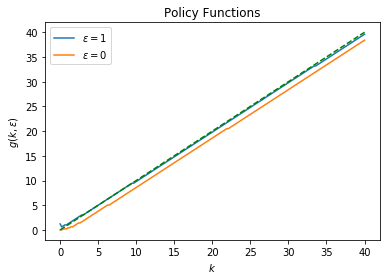

In [7]:
PIE = np.array([[0.9, 0.1],[0.9, 0.1]])

# Setup k-grid
k_low = 0.001
k_high = 40
k_grid = np.linspace(k_low, k_high, N)
k_bar = get_kbar(params)
r_bar = get_r(k_bar, u_bar, params)
w_bar = get_w(k_bar, u_bar, params)
V, pol = vf_itr(k_grid, params, r_bar, w_bar, PIE)

degree = np.zeros(N)
for ii in range(N):
    degree[ii] = k_grid[ii]

plt.plot(k_grid, pol[:,0], k_grid, pol[:,1])
plt.plot(k_grid, degree, 'g--')
plt.title('Policy Functions')
plt.xlabel('$k$')
plt.ylabel('$g(k,\epsilon)$')
plt.legend(('$\epsilon=1$', '$\epsilon=0$'))
plt.show()